In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
dataframe = pd.read_csv('drive/MyDrive/DATA 310/Project 2/qsar_fish_toxicity.csv', delimiter = ';' ,names = ['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','LC50 [-LOG(mol/L)]'])

In [ ]:
dataframe

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [ ]:
X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1].values

**Function**

In [ ]:
def Project2 (model, X, y, k, degrees, a_start, a_end, a_tests, random_state=123):
  import numpy as np
  from sklearn.model_selection import KFold
  from sklearn.preprocessing import StandardScaler, PolynomialFeatures
  from sklearn.linear_model import Ridge, Lasso, ElasticNet
  from sklearn.pipeline import Pipeline
  import matplotlib.pyplot as plt
  from sklearn.svm import SVR

  scale = StandardScaler()

  R2train_avg = []
  R2test_avg = []
  degree_value =[]
  a_value = []

  kf = KFold(n_splits=k, random_state=random_state, shuffle=True)

  for d in range (1,degrees+1,1):
    poly = PolynomialFeatures(degree = d)
    pipe = Pipeline([['Scaler',scale],['Poly Feats',poly]])

    for a in np.linspace(a_start,a_end,a_tests):
      test_model = model(alpha= a, fit_intercept = False, max_iter=5000)

      R2train_raw = []
      R2test_raw = []

      for idxtrain, idxtest in kf.split(X):
        Xtrain = X[idxtrain]
        Xtest = X[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        Xpolytrain = pipe.fit_transform(Xtrain)
        Xpolytest = pipe.transform(Xtest)

        #Regression
        test_model.fit(Xpolytrain,ytrain)
        R2train_raw.append(test_model.score(Xpolytrain,ytrain))
        R2test_raw.append(test_model.score(Xpolytest,ytest))
      R2test_avg.append(np.mean(R2test_raw))
      R2train_avg.append(np.mean(R2train_raw))
      degree_value.append(d)
      a_value.append(a)
  
  return R2test_avg, degree_value, a_value

**Ridge**

In [ ]:
model=Ridge
k = 10
degrees = 3
a_start = 10e-7
a_end = 1
a_tests = 2500

R2test, degree_value, a_value = Project2(model,X,y,k,degrees,a_start,a_end,a_tests)

Optimal Polynomal Degree: 2
Optimal Alpha Value: 0.40496257983193273
R^2 Value at that Point: 0.5666974153610778


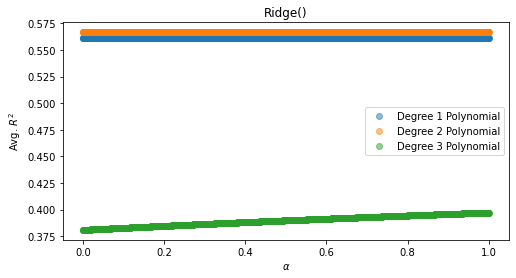

In [ ]:
# Ridge
idx_max = np.argmax(R2test)
print('Optimal Polynomal Degree:',degree_value[idx_max])
print('Optimal Alpha Value:',a_value[idx_max])
print('R^2 Value at that Point:',R2test[idx_max])

plt.figure(figsize=(8,4))
for d in range (1,degrees+1,1):
  plt.scatter(a_value[(d-1)*a_tests:d*a_tests],R2test[(d-1)*a_tests:d*a_tests],alpha = 0.5,label= 'Degree '+str(d)+' Polynomial', cmap = 'jet')
plt.xlabel('$\\alpha$')
plt.ylabel('Avg. $R^2$')
plt.title(model())
plt.legend()
plt.show()

**Lasso**

In [ ]:
model = Lasso
k = 10
degrees = 3
a_start = 10e-5
a_end = 10e-2
a_tests = 2500

R2test, degree_value, a_value = Project2(model,X,y,k,degrees,a_start,a_end,a_tests)

Optimal Polynomal Degree: 2
Optimal Alpha Value: 0.023445978391356544
R^2 Value at that Point: 0.5785801504096296


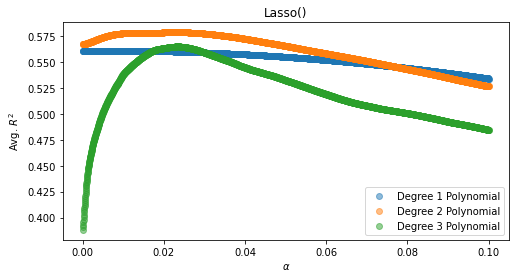

In [ ]:
# Lasso
idx_max = np.argmax(R2test)
print('Optimal Polynomal Degree:',degree_value[idx_max])
print('Optimal Alpha Value:',a_value[idx_max])
print('R^2 Value at that Point:',R2test[idx_max])

plt.figure(figsize=(8,4))
for d in range (1,degrees+1,1):
  plt.scatter(a_value[(d-1)*a_tests:d*a_tests],R2test[(d-1)*a_tests:d*a_tests],alpha = 0.5,label= 'Degree '+str(d)+' Polynomial', cmap = 'jet')
plt.xlabel('$\\alpha$')
plt.ylabel('Avg. $R^2$')
plt.title(model())
plt.legend()
plt.show()

**ElasticNet**

In [ ]:
model = ElasticNet
k = 10
degrees = 3
a_start = 10e-5
a_end = 10e-2
a_tests = 2500

R2test, degree_value, a_value = Project2(model,X,y,k,degrees,a_start,a_end,a_tests)

Optimal Polynomal Degree: 2
Optimal Alpha Value: 0.013691836734693878
R^2 Value at that Point: 0.5726996474034349


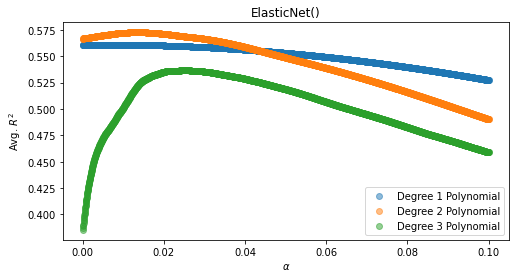

In [ ]:
# ElasticNet
idx_max = np.argmax(R2test)
print('Optimal Polynomal Degree:',degree_value[idx_max])
print('Optimal Alpha Value:',a_value[idx_max])
print('R^2 Value at that Point:',R2test[idx_max])


plt.figure(figsize=(8,4))
for d in range (1,degrees+1,1):
  plt.scatter(a_value[(d-1)*a_tests:d*a_tests],R2test[(d-1)*a_tests:d*a_tests],alpha = 0.5,label= 'Degree '+str(d)+' Polynomial', cmap = 'jet')
plt.xlabel('$\\alpha$')
plt.ylabel('Avg. $R^2$')
plt.title(model())
plt.legend()
plt.show()